# **For Reproducibility**

In [1]:
import random
import numpy as np
import tensorflow as tf
import torch
import os

# Set a seed value
seed_value = 42

# 1. Set `PYTHONHASHSEED` environment variable
os.environ['PYTHONHASHSEED'] = str(seed_value)
# 2. Set `python` built-in pseudo-random generator
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator
tf.random.set_seed(seed_value)
# 5. Set `torch` pseudo-random generator
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value) # if you are using GPU

# Task
Load the Parquet Files

## Load the specified parquet file

### Subtask:
Convert from bytes to pixel brightness



**Reasoning**:
Update the file path in the existing code cell to load the specified parquet file and execute the cell.



## Inspect the dataframe

### Subtask:
Save to pandas df



**Reasoning**:
Display the column names, data types, and first few rows of the DataFrame to understand its structure and the nature of the image data.



## Extract and display images

### Subtask:
Based on the DataFrame structure, write code to extract the image data (e.g., if it's in a specific column) and display the images. This might require using libraries like Pillow or OpenCV.


**Reasoning**:
Import PIL and iterate through the first few rows of the dataframe to extract and display the images.



In [2]:
# Ensure pyarrow is installed in this kernel
!pip install --quiet pyarrow
!pip install pandas Pillow kagglehub ipywidgets numpy matplotlib pyarrow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.6 MB/s eta 0:00:00


In [3]:

import pandas as pd
from PIL import Image
import io
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import matplotlib.pyplot as plt


In [4]:
# Load parquet files
# Make sure to reference download instructions. You have to download the kaggle dataset and upload it, rename it to a data directory. Video guide coming soon
#from: https://drive.google.com/drive/folders/12-1XR8df-rYkwJuMqMgXYQ9dm6EoDx0f?usp=drive_link
#quickstart guide: https://www.youtube.com/watch?v=WPRarAeelAM
#Original source + description: https://advp.niagads.org/downloads
train_df = pd.read_parquet("/content/data/train.parquet")
test_df  = pd.read_parquet("/content/data/test.parquet")

def bytes_to_pixels(b: bytes) -> np.ndarray:
    """
    Convert raw image bytes (e.g. JPEG/PNG) into a 2D numpy array of pixel values (grayscale).
    """
    img = Image.open(io.BytesIO(b))  # convert to grayscale
    return np.array(img)
def extract_bytes(blob):
    """
    Unwrap a dict‐wrapped binary payload if needed,
    otherwise return blob directly.
    """
    if isinstance(blob, dict):
        # try common keys
        for key in ("bytes", "data", "image"):
            if key in blob and isinstance(blob[key], (bytes, bytearray)):
                return blob[key]
        # fallback: first bytes‐like value
        for v in blob.values():
            if isinstance(v, (bytes, bytearray)):
                return v
        raise TypeError(f"No bytes found in dict payload: {list(blob.keys())}")
    return blob

train_df["image"] = train_df["image"].apply(lambda blob: bytes_to_pixels(extract_bytes(blob)))
test_df["image"]  = test_df["image"].apply(lambda blob: bytes_to_pixels(extract_bytes(blob)))

1. label = 2


/tmp/ipython-input-4051836937.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(pixels.astype("uint8"), mode="L")


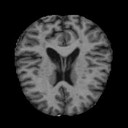

2. label = 0


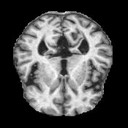

3. label = 3


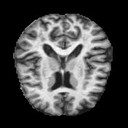

4. label = 3


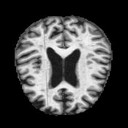

5. label = 2


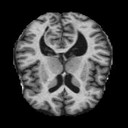

6. label = 2


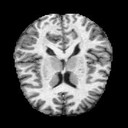

7. label = 2


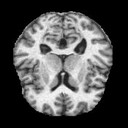

8. label = 2


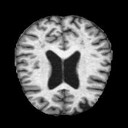

9. label = 3


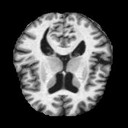

10. label = 2


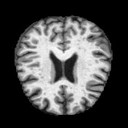

In [5]:
def display_images(df, n=10):
    """
    Display the first n grayscale images (numpy arrays) from df
    along with their labels. Assumes df has columns 'image' and 'label'.
    """
    for i, (_, row) in enumerate(df.head(n).iterrows(), start=1):
        pixels = row["image"]
        label = row.get("label", "")
        # Create a PIL image in 'L' mode (8-bit pixels, black and white)
        img = Image.fromarray(pixels.astype("uint8"), mode="L")
        print(f"{i}. label = {label}")
        display(img)
display_images(train_df)

# **Exploratory Data Analysis**

**1 - Dataset Columns**

In [6]:
train_df.head()

image  label
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      2
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      0
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      3
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      3
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      2

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   5120 non-null   object
 1   label   5120 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.1+ KB


In [8]:
test_df.head()

image  label
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      3
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      0
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      2
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      3
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      0

In [9]:
test_df.columns

Index(['image', 'label'], dtype='object')

**2 - Class Distribution**

In [10]:
train_df["label"].value_counts()

label
2    2566
3    1781
0     724
1      49
Name: count, dtype: int64

**Clinical Meaning of Labels**

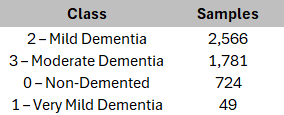

The dataset exhibits a strong class imbalance, with the majority of samples belonging to the **Mild** (label = 2) and **Moderate** (label = 3) **Dementia categories**.

**3 - Image Resolution Consistency**

In [11]:
shapes = train_df["image"].apply(lambda x: x.shape)
shapes.value_counts().head()

image
(128, 128)    5120
Name: count, dtype: int64

In [12]:
img = train_df["image"].iloc[3]

print("Min pixel value:", img.min())
print("Max pixel value:", img.max())

Min pixel value: 0
Max pixel value: 255


# **CNN Baseline**

**Framework Standardization**

To ensure consistency, reproducibility, and efficient collaboration, all models were implemented using TensorFlow/Keras as a unified framework across the project.

**Architecture Rationale**

The model consists of stacked convolutional layers with increasing depth to progressively capture low-level and high-level spatial features, followed by fully connected layers for classification.

**Baseline Motivation**

Starting with a simple architecture allows us to better interpret model behavior and provides a reference point for subsequent improvements using deeper or pre-trained networks.

**1 - Dataset Formatting**

In [13]:
training_images = np.stack(train_df["image"].values)
training_labels = train_df["label"].values

test_images = np.stack(test_df["image"].values)
test_labels = test_df["label"].values

**2 - Reshape**

In [14]:
training_images = training_images.reshape(-1, 128, 128, 1)
test_images = test_images.reshape(-1, 128, 128, 1)

**3 - Split Train / Validation**

We separated training, validation, and test sets to avoid information leakage and ensure unbiased performance evaluation.

In [15]:
from sklearn.model_selection import train_test_split

training_images_train, training_images_val, training_labels_train, training_labels_val = train_test_split(
    training_images,
    training_labels,
    test_size=0.2,
    random_state=42,
    stratify=training_labels
)

**4 - Normalization**

In [16]:
training_images_cnn = training_images_train / 255.0
validation_images_cnn = training_images_val / 255.0
test_images_cnn = test_images / 255.0

**5 - Verification**

In [17]:
print(training_images_cnn.shape)
print(validation_images_cnn.shape)
print(test_images_cnn.shape)

(4096, 128, 128, 1)
(1024, 128, 128, 1)
(1280, 128, 128, 1)


**5 - Baseline CNN Architecture**

In [18]:
from tensorflow.keras import layers, models

model = models.Sequential([

    layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**6 - Model Compilation**

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,629,572 (6.22 MB)

 Trainable params: 1,629,572 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

**7 - Model Training**

In [20]:
Cnn_from_scratch = model.fit(
    training_images_cnn,
    training_labels_train,
    validation_data=(validation_images_cnn, training_labels_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.4724 - loss: 1.0629 - val_accuracy: 0.5508 - val_loss: 0.9204
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5924 - loss: 0.8829 - val_accuracy: 0.6113 - val_loss: 0.8303
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6507 - loss: 0.7669 - val_accuracy: 0.6660 - val_loss: 0.7239
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7508 - loss: 0.5896 - val_accuracy: 0.7939 - val_loss: 0.4911
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8596 - loss: 0.3688 - val_accuracy: 0.8232 - val_loss: 0.4142
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9110 - loss: 0.2468 - val_accuracy: 0.7988 - val_loss: 0.4742
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9325 - loss: 0.1791 - val_accuracy: 0.8994 - val_loss: 0.2457
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9639 - loss: 0.1146 - val_ac

**8 - Model Evaluation**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = model.predict(test_images_cnn)
y_pred = np.argmax(predictions, axis=1)

print(classification_report(
    test_labels,
    y_pred,
    target_names=[
        "Non-Demented",
        "Very Mild Dementia",
        "Mild Dementia",
        "Moderate Dementia"
    ]
))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                    precision    recall  f1-score   support

      Non-Demented       0.97      0.90      0.93       172
Very Mild Dementia       1.00      0.93      0.97        15
     Mild Dementia       0.97      0.97      0.97       634
 Moderate Dementia       0.94      0.96      0.95       459

          accuracy                           0.96      1280
         macro avg       0.97      0.94      0.96      1280
      weighted avg       0.96      0.96      0.96      1280



**9 - Confusion matrix**

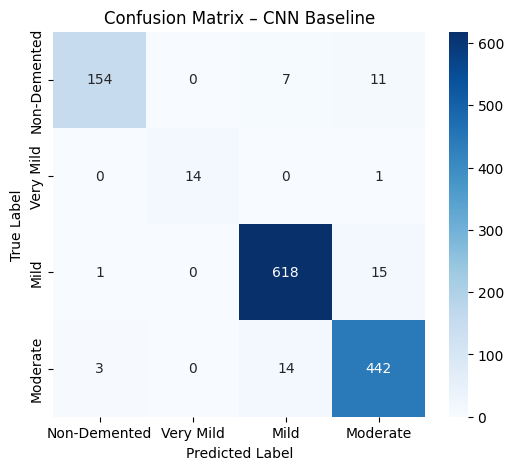

In [22]:
cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Demented", "Very Mild", "Mild", "Moderate"],
    yticklabels=["Non-Demented", "Very Mild", "Mild", "Moderate"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – CNN Baseline")
plt.show()

**10 - Save**

In [23]:
model.save("cnn_baseline.keras")

**Evaluation Strategy**

Due to the strong class imbalance in the dataset, overall accuracy is not sufficient to assess model performance.

In imbalanced datasets, a high accuracy score may be misleading and does not necessarily reflect meaningful clinical performance.

**Confusion Matrix Analysis**

We rely on confusion matrices to analyze class-wise predictions and understand how the model differentiates between different stages of Alzheimer’s disease.

**Clinical Relevance of Recall**

Recall is particularly important in a medical context, as failing to identify early-stage Alzheimer’s cases may have significant clinical consequences.

**Macro F1-Score**

The macro-averaged F1 score provides a balanced evaluation by giving equal importance to all classes, including under-represented ones.

# **CNN with Class Weights & Data Augmentation**

**0 - Initialization**

In [24]:
training_images_aug = training_images_train
training_labels_aug = training_labels_train

validation_images_aug = training_images_val
validation_labels_aug = training_labels_val

test_images_aug = test_images
test_labels_aug = test_labels

**1 - Class Weights**

In [25]:
from collections import Counter
import math

counts = Counter(training_labels)
N = sum(counts.values())
K = len(counts)

class_weight_balanced = {c: N / (K * cnt) for c, cnt in counts.items()}

class_weight_sqrt = {c: math.sqrt(w) for c, w in class_weight_balanced.items()}

class_weight_sqrt

{np.int64(2): 0.7062795941833389,
 np.int64(0): 1.3296449906290673,
 np.int64(3): 0.84776020255325,
 np.int64(1): 5.1110125199995196}

**2 - Data Augmentation**

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.05),
    layers.RandomTranslation(0.05, 0.05),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
], name="data_augmentation")

**3 - CNN with Data Augmentation**

In [27]:
model_aug = models.Sequential([

    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**4 - Compile**

In [28]:
model_aug.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_aug.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**5 - Training with Class Weights**

In [29]:
history_aug = model_aug.fit(
    training_images_aug,
    training_labels_aug,
    validation_data=(validation_images_aug, validation_labels_aug),
    epochs=100,
    batch_size=32,
    class_weight=class_weight_sqrt
)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4623 - loss: 1.0869 - val_accuracy: 0.5225 - val_loss: 1.1133
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5228 - loss: 1.0109 - val_accuracy: 0.4590 - val_loss: 1.0762
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5253 - loss: 0.9509 - val_accuracy: 0.5107 - val_loss: 1.0065
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5521 - loss: 0.9125 - val_accuracy: 0.5332 - val_loss: 0.9726
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5425 - loss: 0.9089 - val_accuracy: 0.5381 - val_loss: 0.9437
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5504 - loss: 0.8914 - val_accuracy: 0.5244 - val_loss: 0.9714
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5751 - loss: 0.8782 - val_accuracy: 0.5361 - val_loss: 0.9539
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5605 - loss: 0.8607 - 

**6 - Evaluation**

In [30]:
y_pred_aug = np.argmax(model_aug.predict(test_images_aug), axis=1)

print(classification_report(
    test_labels_aug,
    y_pred_aug,
    target_names=[
        "Non-Demented",
        "Very Mild Dementia",
        "Mild Dementia",
        "Moderate Dementia"
    ]
))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                    precision    recall  f1-score   support

      Non-Demented       0.87      0.92      0.90       172
Very Mild Dementia       1.00      0.80      0.89        15
     Mild Dementia       0.92      0.94      0.93       634
 Moderate Dementia       0.91      0.88      0.89       459

          accuracy                           0.91      1280
         macro avg       0.93      0.88      0.90      1280
      weighted avg       0.91      0.91      0.91      1280



**Confusion Matrix**

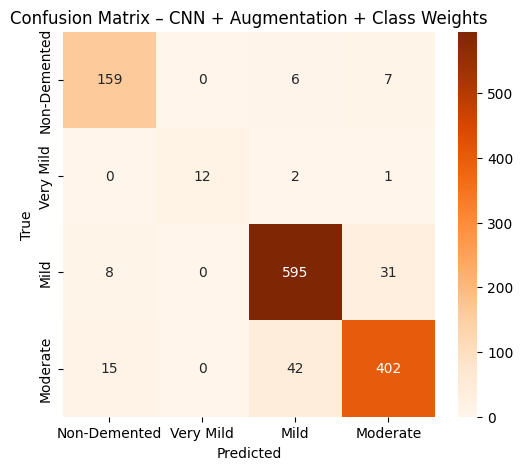

In [31]:
cm = confusion_matrix(test_labels_aug, y_pred_aug)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=["Non-Demented", "Very Mild", "Mild", "Moderate"],
    yticklabels=["Non-Demented", "Very Mild", "Mild", "Moderate"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – CNN + Augmentation + Class Weights")
plt.show()


**7 - Save**

In [32]:
model_aug.save("cnn_aug.keras")

# **CNN with Data Augmentation, Class Weighting and Oversampling**

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**1 - Class distribution**

In [34]:
label_counts = train_df["label"].value_counts().to_dict()
print("Train distribution:", label_counts)

target_count = min(max(label_counts.values()), 800)
print("Target per class:", target_count)

Train distribution: {2: 2566, 3: 1781, 0: 724, 1: 49}
Target per class: 800


**2 - Data augmentation**

In [35]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.10,
    horizontal_flip=False,
    fill_mode="nearest"
)

**3 - Oversampling**

In [36]:
def oversample_class(dataframe, label, target_count, seed=42):
    class_df = dataframe[dataframe["label"] == label]
    current_count = len(class_df)

    if current_count >= target_count:
        return dataframe

    images_to_generate = target_count - current_count
    rng = np.random.default_rng(seed)

    new_rows = []

    while len(new_rows) < images_to_generate:
        row = class_df.sample(
            n=1,
            random_state=int(rng.integers(0, 1_000_000))
        ).iloc[0]

        arr = row["image"]
        arr = np.expand_dims(arr, (0, -1))  # (1, H, W, 1)

        aug_img = next(datagen.flow(arr, batch_size=1, shuffle=False))[0]
        aug_img = aug_img.squeeze().astype("uint8")

        new_rows.append({
            "image": aug_img,
            "label": label
        })

    return pd.concat([dataframe, pd.DataFrame(new_rows)], ignore_index=True)

**4 - Apply to all class**

In [37]:
train_df_oversampled = train_df.copy()

for label, count in label_counts.items():
    if count < target_count:
        train_df_oversampled = oversample_class(
            train_df_oversampled,
            label,
            target_count
        )

print(train_df_oversampled["label"].value_counts())

label
2    2566
3    1781
0     800
1     800
Name: count, dtype: int64


**5 - Conversion in numpy**

In [38]:
training_images_os = np.stack(train_df_oversampled["image"].values)
training_labels_os = train_df_oversampled["label"].values

training_images_os = training_images_os.reshape(-1, 128, 128, 1)

**6 - Normalization**

In [39]:
training_images_os_norm = training_images_os / 255.0
test_images_os_norm = test_images / 255.0

**7 - CNN (oversampling model)**

In [40]:
model_os = models.Sequential([

    layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**8 - Compile**

In [41]:
model_os.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**9 - Train**

In [42]:
history_os = model_os.fit(
    training_images_os_norm,
    training_labels_os,
    validation_data=(test_images_os_norm, test_labels),
    epochs=14,
    batch_size=32,
    class_weight=class_weight_sqrt
)

Epoch 1/14
186/186 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.3662 - loss: 1.4069 - val_accuracy: 0.5742 - val_loss: 0.8798
Epoch 2/14
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6559 - loss: 0.7406 - val_accuracy: 0.7117 - val_loss: 0.6394
Epoch 3/14
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7725 - loss: 0.4920 - val_accuracy: 0.7008 - val_loss: 0.6274
Epoch 4/14
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8643 - loss: 0.2983 - val_accuracy: 0.8281 - val_loss: 0.4228
Epoch 5/14
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9303 - loss: 0.1798 - val_accuracy: 0.8656 - val_loss: 0.3049
Epoch 6/14
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9518 - loss: 0.1355 - val_accuracy: 0.9422 - val_loss: 0.1860
Epoch 7/14
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9752 - loss: 0.0745 - val_accuracy: 0.9547 - val_loss: 0.1551
Epoch 8/14
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9939 - loss: 0.0281 - val_accu

**9 - Evaluation**

In [43]:
y_pred_os = np.argmax(model_os.predict(test_images_os_norm), axis=1)

print(classification_report(
    test_labels,
    y_pred_os,
    target_names=[
        "Non-Demented",
        "Very Mild Dementia",
        "Mild Dementia",
        "Moderate Dementia"
    ]
))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                    precision    recall  f1-score   support

      Non-Demented       0.99      0.94      0.96       172
Very Mild Dementia       1.00      0.93      0.97        15
     Mild Dementia       0.98      0.99      0.99       634
 Moderate Dementia       0.97      0.98      0.98       459

          accuracy                           0.98      1280
         macro avg       0.99      0.96      0.97      1280
      weighted avg       0.98      0.98      0.98      1280



**10 - Save**

In [44]:
model_os.save("cnn_aug_oversampling.keras")

# **CNN with Data Augmentation, Class Weighting, Oversampling and Hyperparameter Optimization**

In parallel to our baseline CNN approach, we developed a more advanced convolutional neural network pipeline focused on **robustness** and **generalization** rather than **raw accuracy**.


This model integrates **data augmentation** to simulate realistic variations in MRI scans, as well as **class weighting** to address the strong class imbalance present in the dataset, particularly for early-stage Alzheimer’s cases.

In addition, a **hyperparameter optimization strategy** was employed to automatically explore different architectural and training configurations, including the **number of convolutional layers**, **filter sizes**, **dense layer dimensions**, **dropout rates**, and **learning rates**.

The goal of this pipeline was not to maximize performance on a single split, but to identify a **stable** and **well-regularized model** capable of handling noisy inputs and underrepresented classes.

The trained model is subsequently **loaded** and **evaluated** on the test set using the same evaluation protocol as the baseline models.

**1 - Model loading**

In [45]:
from tensorflow.keras.models import load_model

model_tuned = load_model("best_model.keras")

**2 - Test images normalization**

In [46]:
test_images_tuned = test_images / 255.0

In [47]:
print(test_images_tuned.shape)

(1280, 128, 128, 1)


**3 - Predictions**

In [48]:
predictions = model_tuned.predict(test_images_tuned)
y_pred_tuned = np.argmax(predictions, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


**4 - Classification report**

In [49]:
print(classification_report(
    test_labels,
    y_pred_tuned,
    target_names=[
        "Non-Demented",
        "Very Mild Dementia",
        "Mild Dementia",
        "Moderate Dementia"
    ]
))

                    precision    recall  f1-score   support

      Non-Demented       0.61      0.86      0.71       172
Very Mild Dementia       0.74      0.93      0.82        15
     Mild Dementia       0.96      0.63      0.76       634
 Moderate Dementia       0.71      0.93      0.80       459

          accuracy                           0.77      1280
         macro avg       0.75      0.84      0.77      1280
      weighted avg       0.82      0.77      0.77      1280



**5 - Confusion matrix**

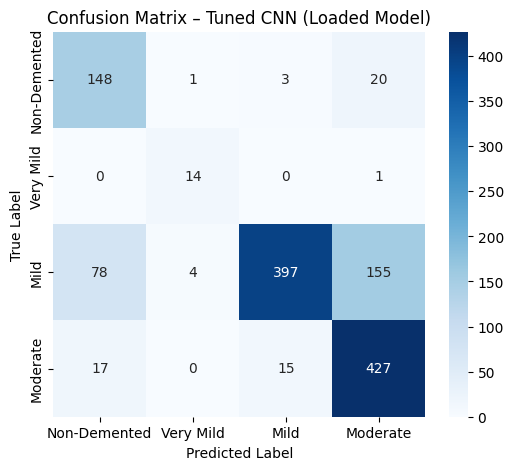

In [50]:
cm = confusion_matrix(test_labels, y_pred_tuned)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Demented", "Very Mild", "Mild", "Moderate"],
    yticklabels=["Non-Demented", "Very Mild", "Mild", "Moderate"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Tuned CNN (Loaded Model)")
plt.show()

# **CNN with Data Augmentation, Class Weighting, Oversampling, Hyperparameter Optimization, Learning Rate Strategy & Fine-tuning**

The model was further improved by applying **fine-tuning** combined with an **adaptive learning rate strategy** (ReduceLROnPlateau).

Fine-tuning was performed on an **augmented Alzheimer MRI dataset**, allowing the previously optimized CNN to refine its learned representations on **a richer** and **more diverse** set of training examples.

Starting from a very low learning rate ensured **stable weight updates**, while progressive learning rate reductions enabled **fine-grained convergence**.

This approach led to **improved validation performance** and better generalization compared to the initial tuned model.

**1 - Fine-tuned Dataset**

In [51]:
import kagglehub
from pathlib import Path

path = kagglehub.dataset_download("uraninjo/augmented-alzheimer-mri-dataset")
print("Dataset path:", path)

aug_dir  = Path(path) / "AugmentedAlzheimerDataset"
orig_dir = Path(path) / "OriginalDataset"

Using Colab cache for faster access to the 'augmented-alzheimer-mri-dataset' dataset.
Dataset path: /kaggle/input/augmented-alzheimer-mri-dataset


In [52]:
IMG_SIZE = (128, 128)
BATCH = 32
SEED = 42

class_names = [
    "NonDemented",
    "VeryMildDemented",
    "MildDemented",
    "ModerateDemented"
]

# TRAIN
train_ds = tf.keras.utils.image_dataset_from_directory(
    aug_dir,
    class_names=class_names,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=True,
    seed=SEED,
    color_mode="grayscale"
)

# ORIGINAL → val + test
orig_ds = tf.keras.utils.image_dataset_from_directory(
    orig_dir,
    class_names=class_names,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=True,
    seed=SEED,
    color_mode="grayscale"
)

# Split 50 / 50
orig_batches = tf.data.experimental.cardinality(orig_ds).numpy()
val_batches = orig_batches // 2

valid_ds = orig_ds.take(val_batches)
test_ds  = orig_ds.skip(val_batches)

Found 33984 files belonging to 4 classes.
Found 6400 files belonging to 4 classes.


**2 - Normalization**

In [53]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_test_ds = test_ds.map(
    lambda x, y: (normalization_layer(x), y)
)

**3 - Model loading**

In [54]:
model_tuned_2 = load_model("best_model_v2.keras")

**4 - Evaluation & Confusion matrix**

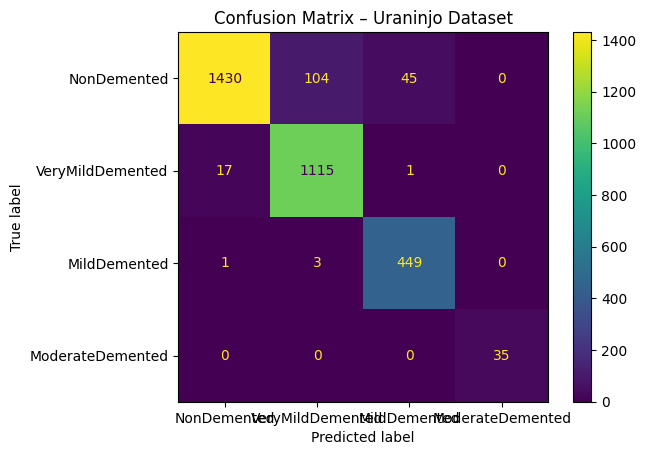

                  precision    recall  f1-score   support

     NonDemented     0.9876    0.9056    0.9448      1579
VeryMildDemented     0.9124    0.9841    0.9469      1133
    MildDemented     0.9071    0.9912    0.9473       453
ModerateDemented     1.0000    1.0000    1.0000        35

        accuracy                         0.9466      3200
       macro avg     0.9518    0.9702    0.9598      3200
    weighted avg     0.9497    0.9466    0.9465      3200



In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

y_true, y_pred = [], []

for x_batch, y_batch in normalized_test_ds:
    probs = model_tuned_2.predict(x_batch, verbose=0)
    preds = np.argmax(probs, axis=1)

    y_true.append(y_batch.numpy())
    y_pred.append(preds)

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(values_format="d")
plt.title("Confusion Matrix – Uraninjo Dataset")
plt.show()

# Report
print(classification_report(
    y_true, y_pred,
    target_names=class_names,
    digits=4
))

**5 - Normalization**

In [56]:
test_images_norm = test_images / 255.0

**6 - Predictions**

In [57]:
y_pred_tuned_2 = np.argmax(
    model_tuned_2.predict(test_images_norm, verbose=0),
    axis=1
)

**7 - Classification report**

In [58]:
print(classification_report(
    test_labels,
    y_pred_tuned_2,
    target_names=[
        "Non-Demented",
        "Very Mild Dementia",
        "Mild Dementia",
        "Moderate Dementia"
    ]
))

                    precision    recall  f1-score   support

      Non-Demented       0.00      0.01      0.00       172
Very Mild Dementia       0.00      0.00      0.00        15
     Mild Dementia       0.06      0.02      0.02       634
 Moderate Dementia       0.00      0.00      0.00       459

          accuracy                           0.01      1280
         macro avg       0.01      0.01      0.01      1280
      weighted avg       0.03      0.01      0.01      1280



Although the fine-tuned model achieved high accuracy on the augmented Alzheimer MRI dataset it was trained on, its performance **dropped drastically** when evaluated on **an another dataset**.

This behavior highlights a strong dataset dependency and illustrates the challenge of **cross-dataset generalization in medical imaging**.

Extensive fine-tuning on a new data distribution can lead to **catastrophic forgetting**, where previously learned representations become **ineffective** on unseen domains.

# **Transfer Learning with EfficientNetB0**

**1 - Resize & RGB**

In [59]:
training_images_netb = tf.image.resize(training_images, (224, 224))
test_images_netb = tf.image.resize(test_images, (224, 224))

training_images_netb = tf.image.grayscale_to_rgb(training_images_netb)
test_images_netb = tf.image.grayscale_to_rgb(test_images_netb)

**2 - Data Augmentation**

In [60]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomTranslation(0.05, 0.05),
    tf.keras.layers.RandomZoom(0.1),
], name="data_aug")

**3 - Base model (EfficientNetB0)**

In [61]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**4 - Model Pipeline**

In [62]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)

x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)

outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model_tl = tf.keras.Model(inputs, outputs)

In [63]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_callback = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    min_delta=1e-3,
    min_lr=1e-7,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=7,
    restore_best_weights=True,
    verbose=1
)

**5 - Compile**

In [64]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_tl.summary()

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_aug (Sequential)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

**6 - Train**

In [65]:
history_tl = model_tl.fit(
    training_images_netb,
    training_labels,
    validation_data=(test_images_netb, test_labels),
    epochs=30,
    batch_size=32,
    class_weight=class_weight_sqrt,
    callbacks=[lr_callback, early_stop]
)

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 126ms/step - accuracy: 0.4759 - loss: 1.1186 - val_accuracy: 0.5242 - val_loss: 0.9797 - learning_rate: 0.0010
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.5372 - loss: 0.9622 - val_accuracy: 0.5437 - val_loss: 0.9402 - learning_rate: 0.0010
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.5427 - loss: 0.9326 - val_accuracy: 0.5680 - val_loss: 0.8986 - learning_rate: 0.0010
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.5440 - loss: 0.9171 - val_accuracy: 0.5492 - val_loss: 0.9161 - learning_rate: 0.0010
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.5417 - loss: 0.8823 - val_accuracy: 0.5633 - val_loss: 0.8841 - learning_rate: 0.0010
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.5604 - loss: 0.8493 - val_accuracy: 0.5773 - val_loss: 0.8551 - learning_rate: 0.0010
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.5594 -

We first evaluate the **frozen pre-trained model** to establish a stable baseline.

**7 - Transfer Learning / Fine-tuning**

In [66]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False

Then, we progressively **unfreeze the deeper layers** to fine-tune high-level representations, allowing the network to better adapt to **Alzheimer-specific patterns** and significantly improve performance.

**8 - Compile & Train again**

In [67]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model_tl.fit(
    training_images_netb,
    training_labels,
    validation_data=(test_images_netb, test_labels),
    epochs=40,
    batch_size=16,
    class_weight=class_weight_sqrt,
    callbacks=[lr_callback, early_stop]
)

Epoch 1/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.5412 - loss: 0.9679 - val_accuracy: 0.6086 - val_loss: 0.8519 - learning_rate: 1.0000e-04
Epoch 2/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.6256 - loss: 0.7207 - val_accuracy: 0.6469 - val_loss: 0.7734 - learning_rate: 1.0000e-04
Epoch 3/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.6671 - loss: 0.6548 - val_accuracy: 0.7047 - val_loss: 0.6988 - learning_rate: 1.0000e-04
Epoch 4/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6773 - loss: 0.6177 - val_accuracy: 0.7063 - val_loss: 0.6493 - learning_rate: 1.0000e-04
Epoch 5/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.7133 - loss: 0.5710 - val_accuracy: 0.6992 - val_loss: 0.6711 - learning_rate: 1.0000e-04
Epoch 6/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.7302 - loss: 0.5313 - val_accuracy: 0.7398 - val_loss: 0.5917 - learning_rate: 1.0000e-04
Epoch 7/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/ste

**9 - Evaluation**

In [68]:
y_pred_tl = np.argmax(model_tl.predict(test_images_netb), axis=1)

print(classification_report(
    test_labels,
    y_pred_tl,
    target_names=[
        "Non-Demented",
        "Very Mild Dementia",
        "Mild Dementia",
        "Moderate Dementia"
    ],
    digits=4
))

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step
                    precision    recall  f1-score   support

      Non-Demented     0.9313    0.8663    0.8976       172
Very Mild Dementia     0.9333    0.9333    0.9333        15
     Mild Dementia     0.9313    0.9621    0.9465       634
 Moderate Dementia     0.9244    0.9063    0.9153       459

          accuracy                         0.9289      1280
         macro avg     0.9301    0.9170    0.9232      1280
      weighted avg     0.9289    0.9289    0.9286      1280



**10 - Save**

In [69]:
model_tl.save("efficientnet_finetuned.keras")

# **Transfer Learning with ResNet**

In [70]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam

**1 - Load Dataset**

In [71]:
BATCH_SIZE = 16
IMG_SIZE = (224, 224)

train_ds = tf.data.Dataset.from_tensor_slices(
    (training_images, training_labels)
)

test_ds = tf.data.Dataset.from_tensor_slices(
    (test_images, test_labels)
)

**2 - Data augmentation**

In [72]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.05),
    layers.RandomTranslation(0.05, 0.05),
    layers.RandomZoom(0.1),
], name="data_augmentation")

**3 - ResNet preprocessing**

In [73]:
def preprocess_resnet(x, y, augment=False):
    x = tf.image.resize(x, IMG_SIZE)
    x = tf.repeat(x, repeats=3, axis=-1)  # grayscale to RGB (gray x3)
    if augment:
        x = data_augmentation(x)
    x = preprocess_input(x)
    return x, y

In [74]:
train_ds = (
    train_ds
    .shuffle(1024)
    .map(lambda x, y: preprocess_resnet(x, y, augment=True),
         num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    test_ds
    .map(lambda x, y: preprocess_resnet(x, y, augment=False),
         num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

**4 - Load pre-trained ResNet**

In [75]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


**5 - Freeze the backbone**

In [76]:
base_model.trainable = False

**6 - Add custom classification head**

In [77]:
model_resnet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4, activation="softmax")
])

**7 - Compile**

In [78]:
model_resnet.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_resnet.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

**8 - Train (frozen ResNet)**

In [79]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

lr_callback = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

In [80]:
history_resnet = model_resnet.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    class_weight=class_weight_sqrt,
    callbacks=[early_stop, lr_callback]
)

Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 103s 278ms/step - accuracy: 0.4191 - loss: 1.2365 - val_accuracy: 0.5094 - val_loss: 0.9610 - learning_rate: 0.0010
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 85s 265ms/step - accuracy: 0.5193 - loss: 0.9968 - val_accuracy: 0.5117 - val_loss: 0.9323 - learning_rate: 0.0010
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 155s 307ms/step - accuracy: 0.5319 - loss: 0.9423 - val_accuracy: 0.5344 - val_loss: 0.9674 - learning_rate: 0.0010
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 82s 255ms/step - accuracy: 0.5467 - loss: 0.8932 - val_accuracy: 0.5359 - val_loss: 0.8897 - learning_rate: 0.0010
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 83s 259ms/step - accuracy: 0.5393 - loss: 0.8892 - val_accuracy: 0.5453 - val_loss: 0.9111 - learning_rate: 0.0010
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 142s 259ms/step - accuracy: 0.5283 - loss: 0.8923 - val_accuracy: 0.5711 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 82s 256ms/step - accuracy: 

**9 - Evaluation**

In [81]:
test_loss, test_acc = model_resnet.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5563 - loss: 0.8313
Test Accuracy: 0.5703


### **Fine-Tuning ResNet**

**10 - Unfreeze last layers**

In [82]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False

**11 - Recompile**

In [83]:
model_resnet.compile(
    optimizer=Adam(learning_rate=1e-5),  # smaller LR
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

**12 - Fine-tuning**

In [84]:
history_resnet_ft = model_resnet.fit(
    train_ds,
    validation_data=test_ds,
    epochs=40,
    class_weight=class_weight_sqrt,
    callbacks=[early_stop, lr_callback]
)

Epoch 1/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 112s 289ms/step - accuracy: 0.5450 - loss: 1.0239 - val_accuracy: 0.5586 - val_loss: 0.8624 - learning_rate: 1.0000e-05
Epoch 2/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 90s 281ms/step - accuracy: 0.5743 - loss: 0.7634 - val_accuracy: 0.5852 - val_loss: 0.8065 - learning_rate: 1.0000e-05
Epoch 3/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 142s 282ms/step - accuracy: 0.5729 - loss: 0.7270 - val_accuracy: 0.6062 - val_loss: 0.7719 - learning_rate: 1.0000e-05
Epoch 4/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 90s 282ms/step - accuracy: 0.6073 - loss: 0.7011 - val_accuracy: 0.6086 - val_loss: 0.7464 - learning_rate: 1.0000e-05
Epoch 5/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 91s 283ms/step - accuracy: 0.6401 - loss: 0.6757 - val_accuracy: 0.6109 - val_loss: 0.7422 - learning_rate: 1.0000e-05
Epoch 6/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 90s 281ms/step - accuracy: 0.6338 - loss: 0.6572 - val_accuracy: 0.6359 - val_loss: 0.7282 - learning_rate: 1.0000e-05
Epoch 7/40
320/320 ━━━━━━━━━━━━━━━━━━━━ 92s 

**13 - Evaluation**

In [85]:
y_true = []
y_pred = []

for x_batch, y_batch in test_ds:
    probs = model_resnet.predict(x_batch, verbose=0)
    preds = np.argmax(probs, axis=1)

    y_true.extend(y_batch.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [86]:
CLASS_NAMES = [
    "Non Demented",
    "Very Mild Dementia",
    "Mild Dementia",
    "Moderate Dementia"
]

print(classification_report(
    y_true,
    y_pred,
    target_names=CLASS_NAMES,
    digits=4
))

                    precision    recall  f1-score   support

      Non Demented     0.9143    0.9302    0.9222       172
Very Mild Dementia     1.0000    0.9333    0.9655        15
     Mild Dementia     0.9459    0.9653    0.9555       634
 Moderate Dementia     0.9347    0.9041    0.9192       459

          accuracy                         0.9383      1280
         macro avg     0.9487    0.9333    0.9406      1280
      weighted avg     0.9383    0.9383    0.9381      1280



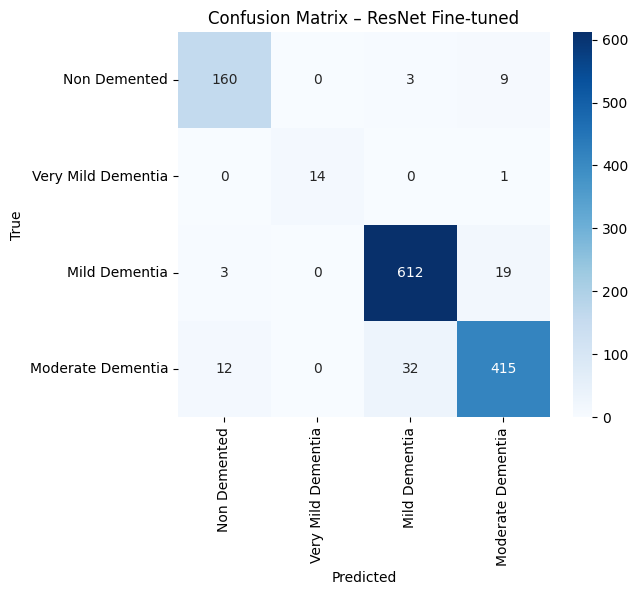

In [87]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=CLASS_NAMES,
    yticklabels=CLASS_NAMES
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – ResNet Fine-tuned")
plt.show()

**14 - Save model**

In [88]:
model_resnet.save("resnet50_finetuned.keras")

# **Test “prod-like”**

In [89]:
CLASS_NAMES = [
    "Non Demented",
    "Very Mild Dementia",
    "Mild Dementia",
    "Moderate Dementia"
]

**CNN (grayscale, 128×128)**

In [90]:
def predict_single_image_cnn(model, img_path, img_size=(128, 128)):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=1, expand_animations=False)
    img = tf.image.resize(img, img_size)
    img = tf.cast(img, tf.float32) / 255.0
    inp = tf.expand_dims(img, axis=0)  # (1, H, W, 1)

    probs = model.predict(inp, verbose=0)[0]
    top_idx = int(np.argmax(probs))
    top_class = CLASS_NAMES[top_idx]
    top_percent = float(probs[top_idx] * 100)

    print(f"Predicted class: {top_class} ({top_percent:.2f}%)")

    plt.figure(figsize=(4,4))
    plt.imshow(img.numpy().squeeze(), cmap="gray")
    plt.title(f"{top_class} — {top_percent:.2f}%")
    plt.axis("off")
    plt.show()

**Transfer Learning (EfficientNet / ResNet, RGB 224×224)**

In [91]:
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_single_image_tl(model, img_path, img_size=(224, 224)):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, img_size)
    img = tf.cast(img, tf.float32)

    img = preprocess_input(img)
    inp = tf.expand_dims(img, axis=0)  # (1, 224, 224, 3)

    probs = model.predict(inp, verbose=0)[0]
    top_idx = int(np.argmax(probs))
    top_class = CLASS_NAMES[top_idx]
    top_percent = float(probs[top_idx] * 100)

    print(f"Predicted class: {top_class} ({top_percent:.2f}%)")

    plt.figure(figsize=(4,4))
    plt.imshow(img.numpy().astype("uint8"))
    plt.title(f"{top_class} — {top_percent:.2f}%")
    plt.axis("off")
    plt.show()

**Test all models**

To complement quantitative evaluation, we also assess **each model** on individual MRI scans from an external dataset, simulating **real-world inference** and comparing confidence levels across architectures.

In [92]:
img_paths = {
    "Non Demented": "/content/OAS1_0004_MR1_mpr-2_116.jpg",
    "Very Mild Dementia": "/content/OAS1_0003_MR1_mpr-3_105.jpg",
    "Mild Dementia": "/content/OAS1_0028_MR1_mpr-2_105.jpg",
    "Moderate Dementia": "/content/OAS1_0308_MR1_mpr-3_123.jpg"
}

In [93]:
model_cnn = load_model("cnn_baseline.keras")
model_aug = load_model("cnn_aug.keras")
model_os  = load_model("cnn_aug_oversampling.keras")
model_tuned = load_model("best_model.keras")
model_eff = load_model("efficientnet_finetuned.keras")
model_res = load_model("resnet50_finetuned.keras")


=== TRUE CLASS: Non Demented ===

CNN baseline
Predicted class: Non Demented (93.70%)


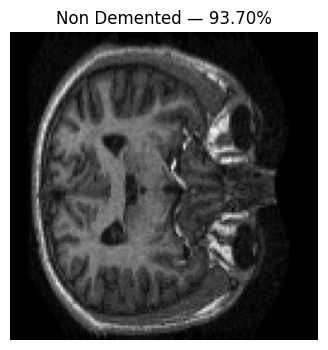

CNN + Aug
Predicted class: Moderate Dementia (43.96%)


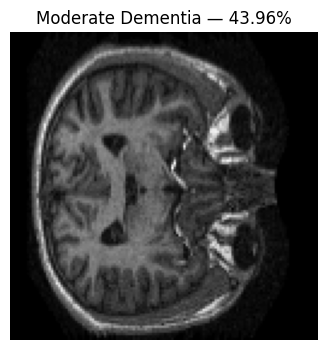

CNN + Oversampling
Predicted class: Non Demented (99.99%)


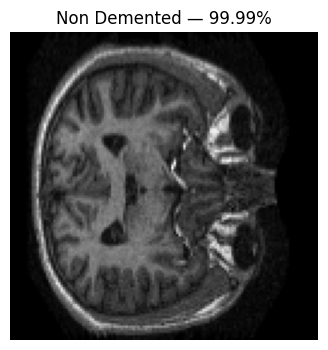

CNN Tuned


Predicted class: Moderate Dementia (59.36%)


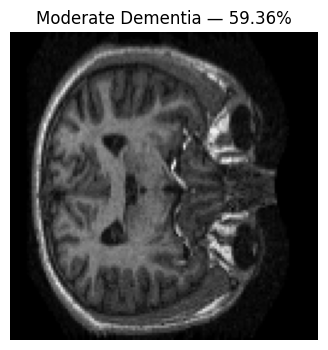

EfficientNet


Predicted class: Moderate Dementia (84.00%)


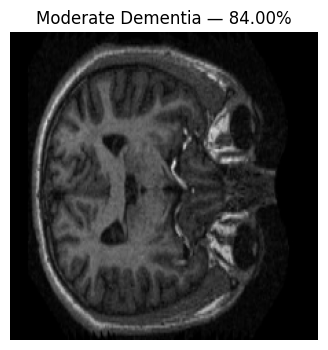

ResNet
Predicted class: Moderate Dementia (99.34%)


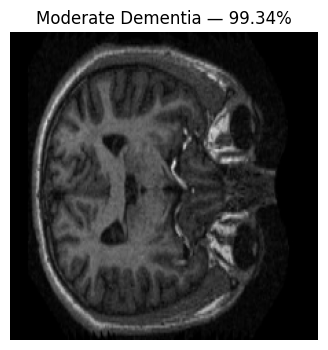


=== TRUE CLASS: Very Mild Dementia ===

CNN baseline
Predicted class: Mild Dementia (100.00%)


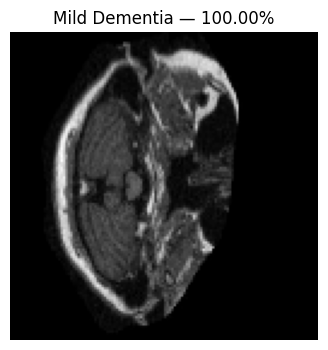

CNN + Aug
Predicted class: Moderate Dementia (43.96%)


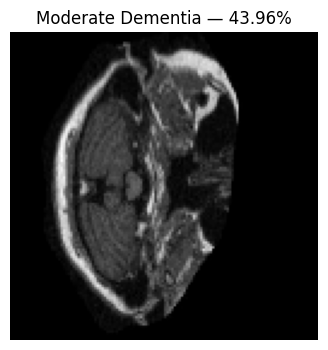

CNN + Oversampling
Predicted class: Non Demented (99.96%)


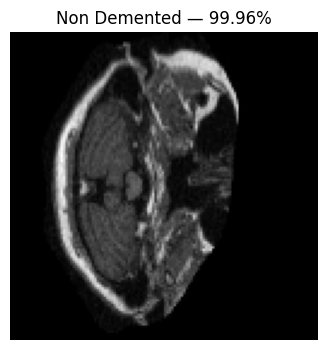

CNN Tuned
Predicted class: Moderate Dementia (57.82%)


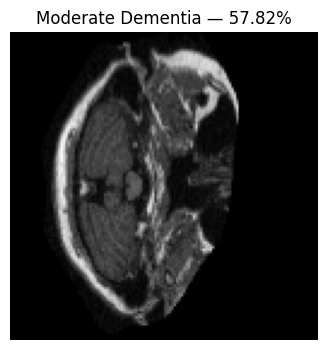

EfficientNet
Predicted class: Non Demented (79.21%)


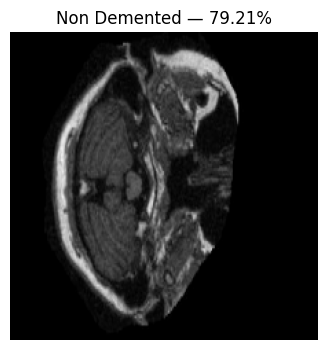

ResNet
Predicted class: Moderate Dementia (75.30%)


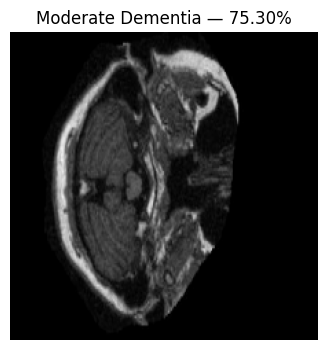


=== TRUE CLASS: Mild Dementia ===

CNN baseline
Predicted class: Mild Dementia (100.00%)


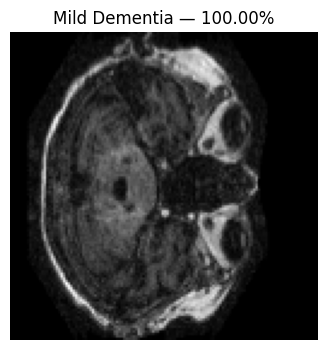

CNN + Aug
Predicted class: Moderate Dementia (43.96%)


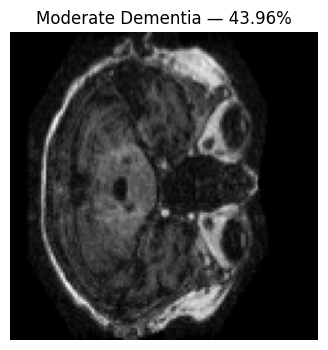

CNN + Oversampling
Predicted class: Non Demented (100.00%)


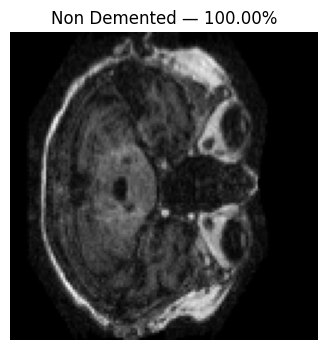

CNN Tuned
Predicted class: Non Demented (81.81%)


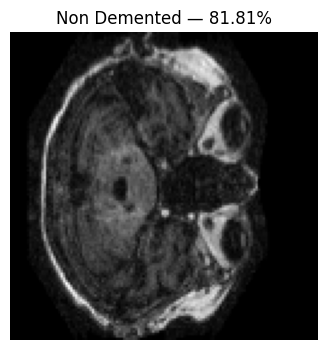

EfficientNet
Predicted class: Moderate Dementia (79.34%)


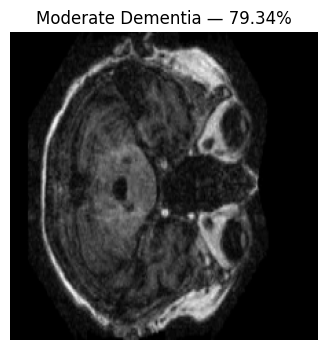

ResNet
Predicted class: Moderate Dementia (70.07%)


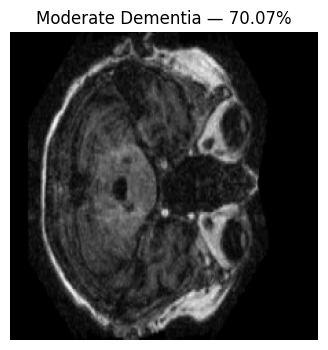


=== TRUE CLASS: Moderate Dementia ===

CNN baseline
Predicted class: Non Demented (100.00%)


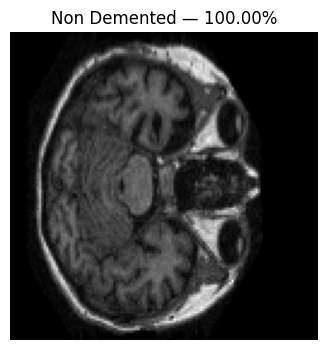

CNN + Aug
Predicted class: Moderate Dementia (43.96%)


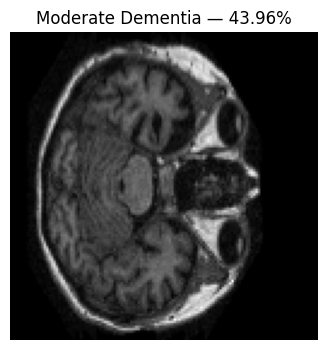

CNN + Oversampling
Predicted class: Non Demented (100.00%)


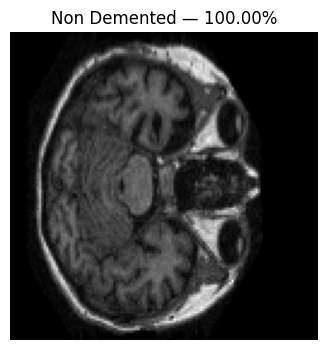

CNN Tuned
Predicted class: Non Demented (94.17%)


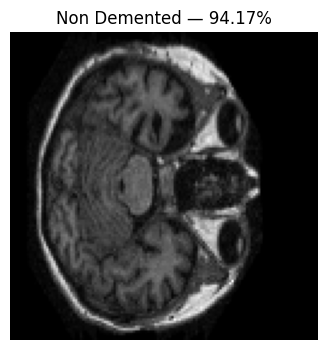

EfficientNet
Predicted class: Non Demented (99.99%)


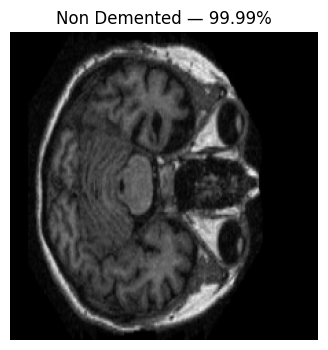

ResNet
Predicted class: Moderate Dementia (99.79%)


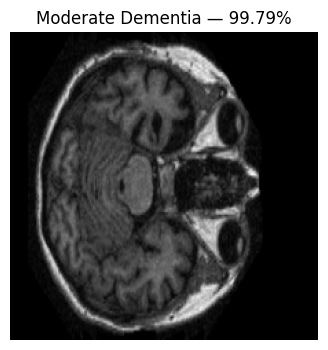

In [94]:
for true_class, path in img_paths.items():
    print(f"\n=== TRUE CLASS: {true_class} ===\n")

    print("CNN baseline")
    predict_single_image_cnn(model_cnn, path)

    print("CNN + Aug")
    predict_single_image_cnn(model_aug, path)

    print("CNN + Oversampling")
    predict_single_image_cnn(model_os, path)

    print("CNN Tuned")
    predict_single_image_cnn(model_tuned, path)

    print("EfficientNet")
    predict_single_image_tl(model_eff, path)

    print("ResNet")
    predict_single_image_tl(model_res, path)

Despite high validation accuracies obtained during training, all models exhibited a **significant performance drop** when evaluated on an unseen dataset.

This highlights a strong domain shift between datasets, caused by **differences** in MRI acquisition protocols, preprocessing steps, and image distributions.

Even advanced architectures such as **EfficientNet** and **ResNet** struggled to generalize across datasets, emphasizing that high in-dataset performance does not guarantee real-world robustness.

This experiment demonstrates the importance of **cross-dataset evaluation** in medical imaging applications.

# **Self-Supervised Anomaly Detection with Autoencoder**

In addition to supervised CNN and transfer learning models, we explored an alternative **self-supervised approach** based on an **autoencoder** trained only on healthy brain MRI images (Non-Demented).

The core idea is simple :

instead of directly predicting Alzheimer stages, the model learns **the normal brain structure** and **detects deviations** as reconstruction anomalies.

**1 - Loading the trained autoencoder**

In [95]:
autoencoder = tf.keras.models.load_model("best_auto-encodeur.keras")

autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 262144)         │    33,816,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 128, 128, 8)    │        18,440 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 128, 128, 1)    │            73 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,997,605 (778.19 MB)

 Trainable params: 67,999,025 (259.40 MB)

 Non-trainable params: 528 (2.06 KB)

 Optimizer params: 135,998,052 (518.79 MB)

**2 - Utilities : image loading and preprocessing**

In [96]:
IMG_SIZE = (128, 128)

def load_grayscale_128(fp):
    img_bytes = tf.io.read_file(fp)
    img = tf.io.decode_image(
        img_bytes, channels=1, expand_animations=False
    )
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.ensure_shape(img, [128, 128, 1])
    return img

**3 - Calibrate anomaly threshold on healthy images**

The threshold is estimated **only from Non-Demented images**, using a high quantile of the reconstruction error.

In [97]:
def estimate_error_threshold_from_normal(
    model, normal_dir, n_calib=300, q=0.995, seed=42
):
    rng = np.random.default_rng(seed)
    files = sorted(list(normal_dir.glob("*.jpg")))
    files = rng.choice(files, size=min(n_calib, len(files)), replace=False)

    imgs = tf.stack([load_grayscale_128(str(f)) for f in files], axis=0)
    recons = model.predict(imgs, verbose=0)

    err = np.abs(imgs.numpy() - recons)
    return float(np.quantile(err.reshape(-1), q))

In [98]:
NonDemented = orig_dir / "NonDemented"

threshold = estimate_error_threshold_from_normal(
    autoencoder,
    normal_dir=NonDemented,
    n_calib=300,
    q=0.995,
    seed=SEED
)

print(f"Anomaly threshold: {threshold:.5f}")

Anomaly threshold: 0.15798


**4 - Anomaly map and red overlay visualization**

In [99]:
def make_overlay(img01, err_map, thr, alpha=0.55):
    img = img01.squeeze(-1)
    mask = (err_map.squeeze(-1) > thr).astype(np.float32)

    base = np.stack([img, img, img], axis=-1)
    red = np.zeros_like(base)
    red[..., 0] = 1.0

    overlay = base * (1 - alpha * mask[..., None]) + red * (alpha * mask[..., None])
    return np.clip(overlay, 0, 1)

**5 - Visualize reconstruction anomalies across all classes**

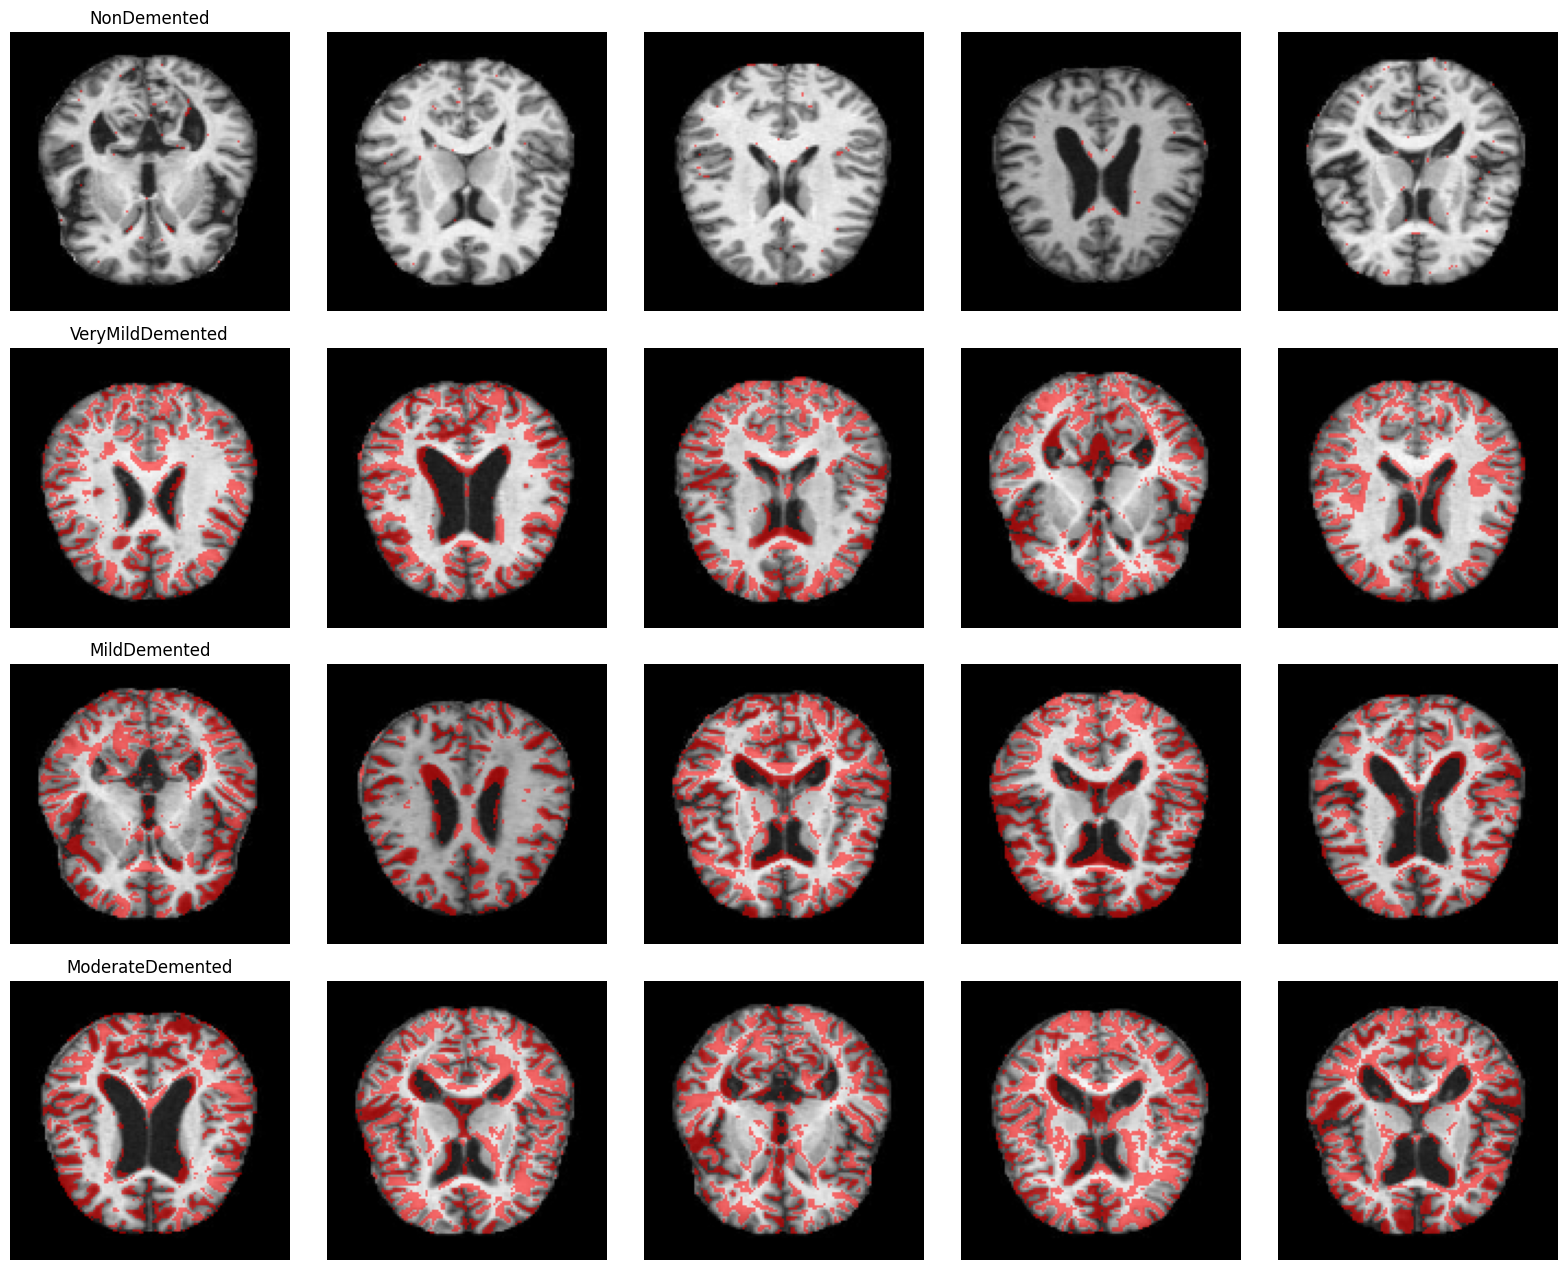

In [100]:
CLASSES = [
    ("NonDemented", orig_dir / "NonDemented"),
    ("VeryMildDemented", orig_dir / "VeryMildDemented"),
    ("MildDemented", orig_dir / "MildDemented"),
    ("ModerateDemented", orig_dir / "ModerateDemented"),
]

N_SHOW = 5
SEED = 42

def sample_files(files, k, seed):
    rng = np.random.default_rng(seed)
    return rng.choice(files, size=k, replace=False)

fig, axes = plt.subplots(
    len(CLASSES), N_SHOW,
    figsize=(3.2 * N_SHOW, 3.2 * len(CLASSES))
)

for r, (cls_name, cls_dir) in enumerate(CLASSES):
    files = sorted(list(cls_dir.glob("*.jpg")))
    chosen = sample_files(files, N_SHOW, seed=SEED + r)

    imgs = tf.stack(
        [load_grayscale_128(str(fp)) for fp in chosen], axis=0
    )
    recons = autoencoder.predict(imgs, verbose=0)
    err = np.abs(imgs.numpy() - recons)

    for c in range(N_SHOW):
        overlay = make_overlay(imgs.numpy()[c], err[c], threshold)

        ax = axes[r, c]
        ax.imshow(overlay)
        ax.axis("off")

        if c == 0:
            ax.set_title(cls_name, fontsize=12)

plt.tight_layout()
plt.show()

The highlighted regions should be interpreted as **reconstruction anomalies**, indicating **deviations** from the **normal brain** structure learned during self-supervised training, rather than precise **pathological markers**.

**6 - Severity Scoring from Reconstruction Error**

In [101]:
def compute_severity_scores(img01, recon, threshold):
    """
    img01   : (H, W, 1) input image normalized in [0,1]
    recon   : (H, W, 1) autoencoder reconstruction
    threshold : pixel-wise anomaly threshold

    Returns:
        mean_error    : average reconstruction error (severity score)
        anomaly_ratio : percentage of anomalous pixels
    """
    err_map = np.abs(img01 - recon)

    mean_error = float(err_map.mean())

    anomaly_ratio = float((err_map > threshold).mean())

    return mean_error, anomaly_ratio

**7 - Show scores during visualization**

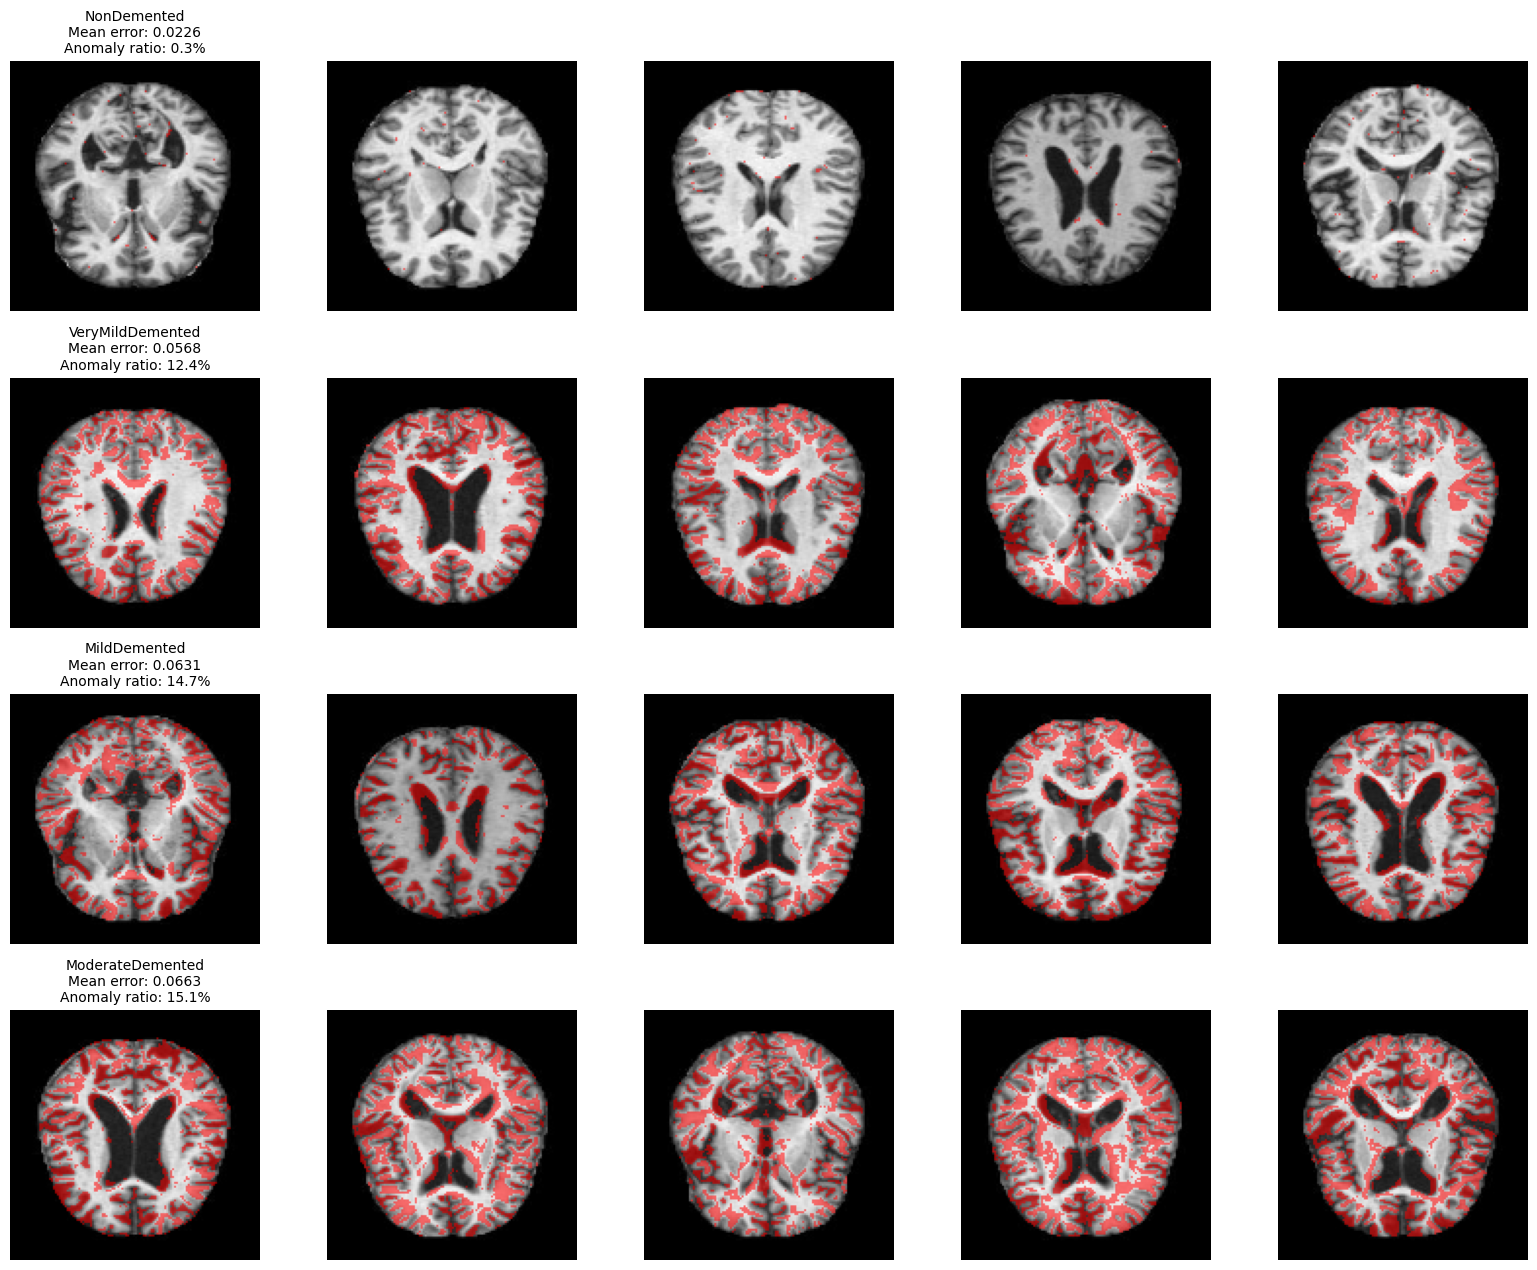

In [102]:
CLASSES = [
    ("NonDemented", orig_dir / "NonDemented"),
    ("VeryMildDemented", orig_dir / "VeryMildDemented"),
    ("MildDemented", orig_dir / "MildDemented"),
    ("ModerateDemented", orig_dir / "ModerateDemented"),
]

N_SHOW = 5
SEED = 42

def sample_files(files, k, seed):
    rng = np.random.default_rng(seed)
    return rng.choice(files, size=k, replace=False)

fig, axes = plt.subplots(
    len(CLASSES), N_SHOW,
    figsize=(3.2 * N_SHOW, 3.2 * len(CLASSES))
)

for r, (cls_name, cls_dir) in enumerate(CLASSES):
    files = sorted(list(cls_dir.glob("*.jpg")))
    chosen = sample_files(files, N_SHOW, seed=SEED + r)

    imgs = tf.stack(
        [load_grayscale_128(str(fp)) for fp in chosen], axis=0
    )

    recons = autoencoder.predict(imgs, verbose=0)
    err = np.abs(imgs.numpy() - recons)

    for c in range(N_SHOW):
        mean_err, anomaly_ratio = compute_severity_scores(
            imgs.numpy()[c],
            recons[c],
            threshold
        )

        overlay = make_overlay(imgs.numpy()[c], err[c], threshold)

        ax = axes[r, c]
        ax.imshow(overlay)
        ax.axis("off")

        if c == 0:
            ax.set_title(
                f"{cls_name}\n"
                f"Mean error: {mean_err:.4f}\n"
                f"Anomaly ratio: {anomaly_ratio*100:.1f}%",
                fontsize=10
            )

plt.tight_layout()
plt.show()